# **Customer Churn Prediction Model**

Source:

- Nafisa Lawal Idris, Understanding Customer Churn Prediction Using Machine Learning, https://medium.com/@nafisaidris413/understanding-customer-churn-prediction-using-machine-learning-231540c04894
- nafisal awalidris, Customer-Churn-Prediction-Model, https://github.com/nafisalawalidris/Customer-Churn-Prediction-Model/blob/master/Customer_Churn_Prediction_Model.ipynb

The primary objective of this project is to develop a machine learning model capable of predicting customer churn for a telecom company. Customer churn occurs when customers stop using a company's services, and accurately predicting it can help the business take preventive actions. The project includes data preprocessing, model training, evaluation, and deploying the model on a free deployment platform, making it accessible online for real-time predictions.

### **Problem Statement**
Telecommunication companies face significant challenges in retaining customers due to competitive pressures and the availability of multiple service providers. High customer churn rates negatively impact revenue and customer acquisition efforts. Understanding and predicting churn behavior allows companies to identify at-risk customers and apply targeted interventions. In this project, we aim to address the problem of customer churn by leveraging customer demographic and service usage data to create a predictive model that can help the telecom company reduce churn rates and improve customer retention strategies.

### **Key Steps in the Project**

### 1. **Data Exploration and Preprocessing**
We begin by loading and exploring the dataset, followed by cleaning the data, encoding categorical variables, scaling numerical features and performing exploratory analysis to uncover meaningful insights.

### 2. **Feature Engineering**
We identify the most relevant features contributing to customer churn prediction and create new ones where necessary, improving the model’s accuracy by leveraging domain expertise.

### 3. **Model Training**
The dataset is split into training and test sets and machine learning models such as Random Forest and XGBoost are trained to predict churn, with performance evaluated through metrics like accuracy and F1-score.

### 4. **Model Evaluation and Selection**
We compare the performance of the models, select the best-performing one and fine-tune its hyperparameters to maximise predictive accuracy.

### 5. **Model Deployment**
The selected model is deployed on a free platform (e.g., Heroku or Streamlit) making it accessible through an API or web interface for real-time predictions.

### 6. **User Interface**
A simple and intuitive user interface is designed, allowing users to input customer data and receive churn predictions, with clear guidance on how to interpret the results.

### 7. **Documentation and Presentation**
We document each step of the project thoroughly and prepare a comprehensive report or presentation summarising the project’s findings, model performance and its real-world applications.


### **Step 1: Data Exploration and Preprocessing**

In [132]:
# -------------------------- Import Libraries --------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, roc_curve, auc)
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb

# Set up warnings filter and seaborn style
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Initialise a list for feature importances
importances = []

In [133]:
# -------------------------- Load Dataset --------------------------

# Load the dataset
file_path = "data/Telco_customer_churn.xlsx"
data = pd.read_excel(file_path)

# Create a copy of the data as df
df = data.copy()

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing 'TotalCharges' with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Check if df is defined
print("DataFrame 'df' has been created successfully.")
print(df.head())  # Display the first few rows of df

DataFrame 'df' has been created successfully.
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport St

In [134]:
# -------------------------- Data Exploration --------------------------
# Display the first few rows of the dataset
print("Dataset loaded successfully. Here are the first 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Basic statistics and data info
print("\nDataset Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe(include='all'))  # Include all columns for descriptive stats

Dataset loaded successfully. Here are the first 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  Tech

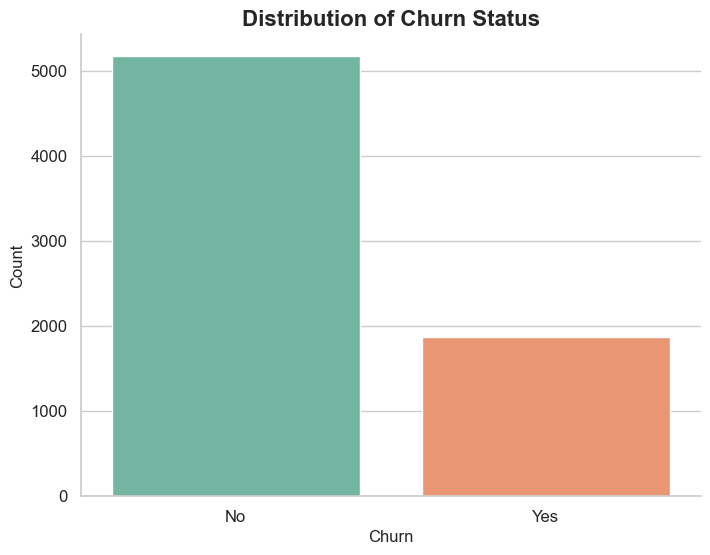

In [135]:
# -------------------------- Visualizations --------------------------

# Visualise distribution of Churn
plt.figure(figsize=(8,6))
sns.countplot(x='Churn', data=data, palette="Set2")
plt.title('Distribution of Churn Status', fontsize=16, fontweight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

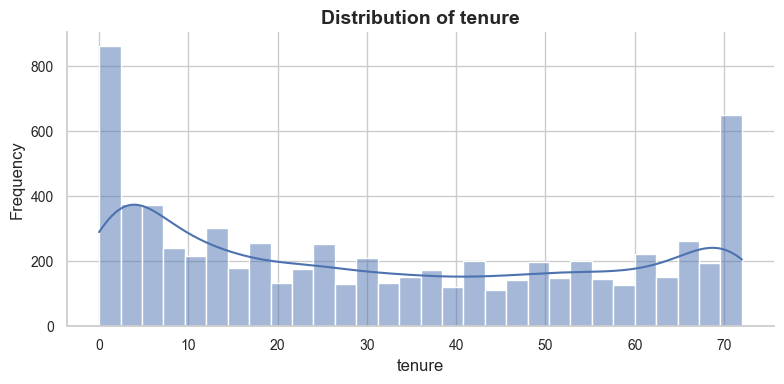

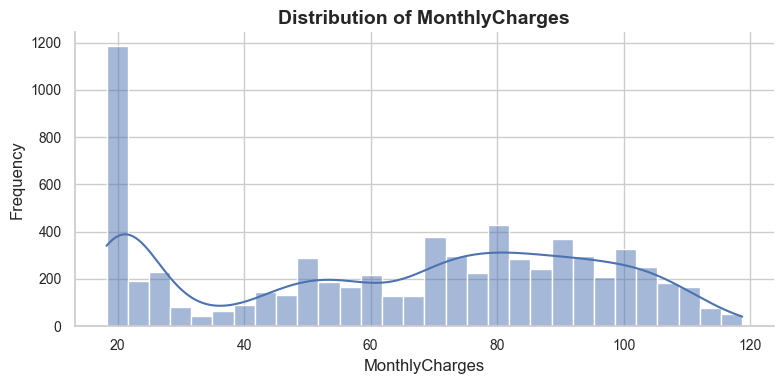

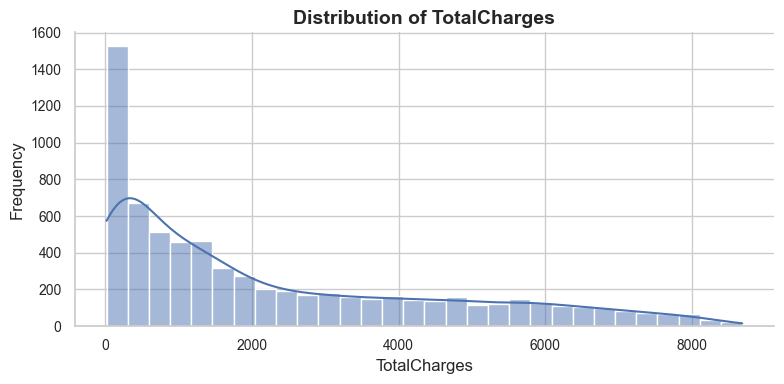

In [136]:
# Distribution of Key Numerical Variables
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True, palette="Set1")  # Changed data to df
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    sns.despine()
    plt.show()


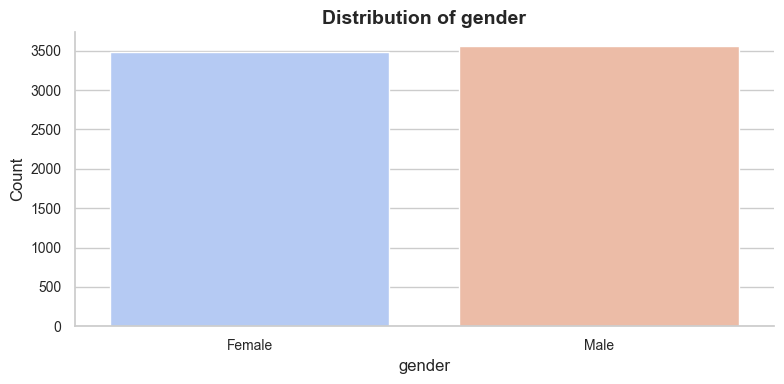

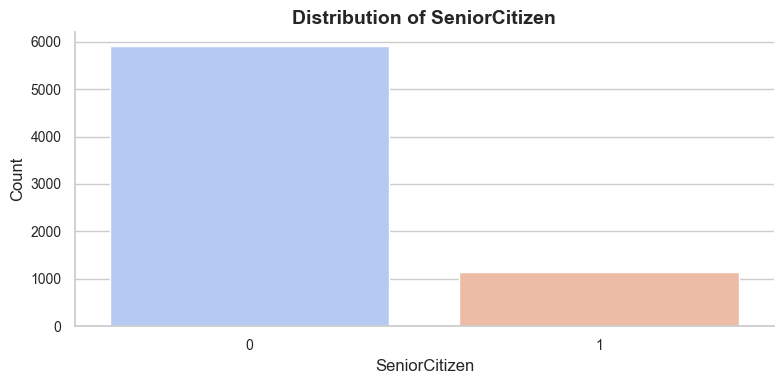

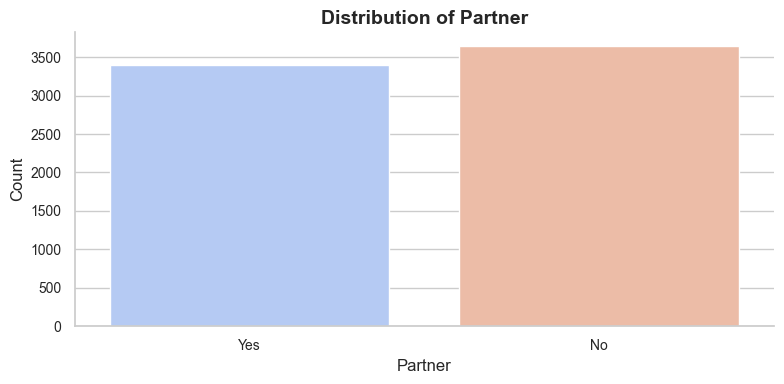

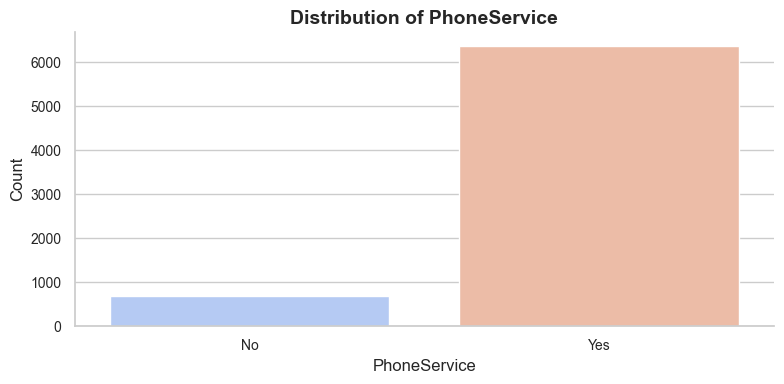

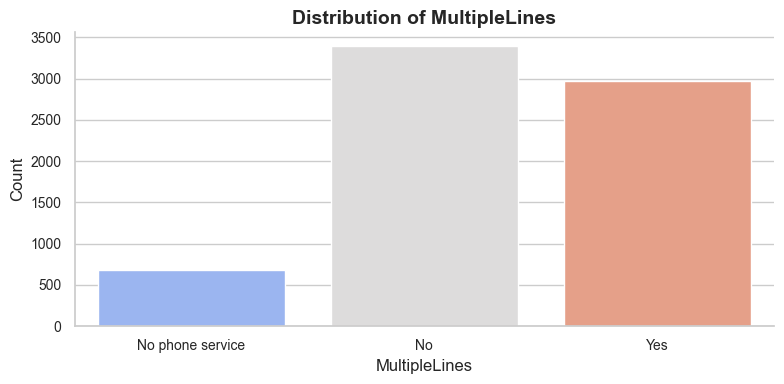

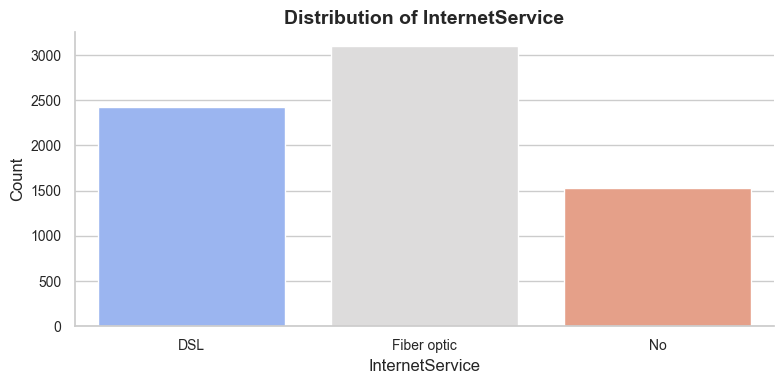

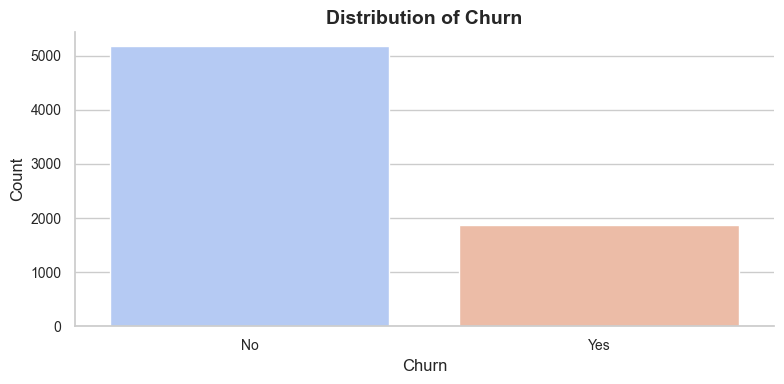

In [137]:
# Distribution of Key Categorical Variables
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'PhoneService', 'MultipleLines', 'InternetService', 'Churn']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=data[col], palette="coolwarm")
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    sns.despine()
    plt.show()

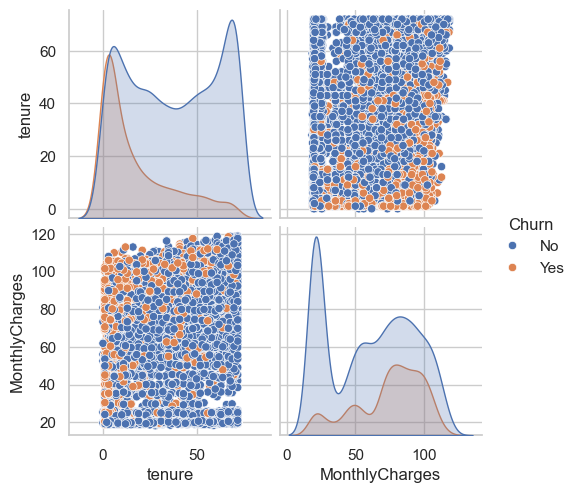

In [138]:
# 4. Pairplot for relationships between important features
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], diag_kind='kde', hue='Churn')
plt.show()

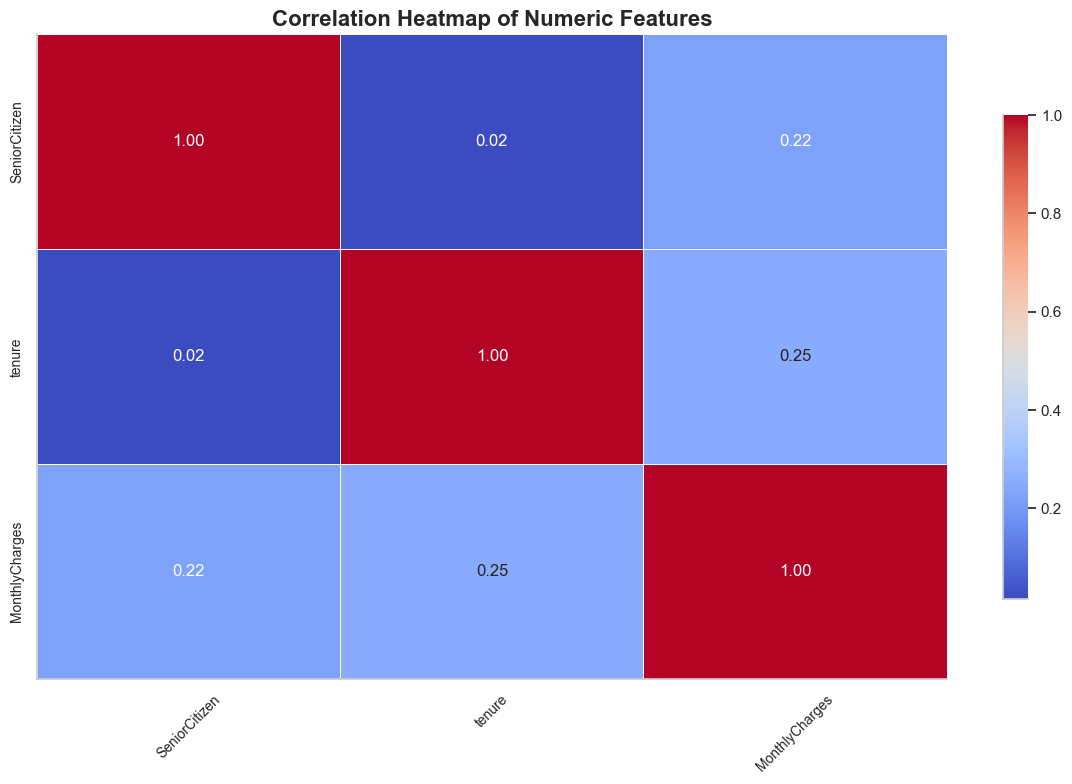

In [139]:
# Correlation Heatmap 

# Filter out non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Visualize correlations between numeric features using a compelling color map
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
                      cbar_kws={"shrink": 0.75})  # Add color bar for better context

# Enhance the heatmap
plt.title('Correlation Heatmap of Numeric Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout to fit everything nicely
sns.despine()  # Remove unnecessary spines
plt.show()

### **Step 2: Feature Engineering**

In [140]:
# -------------------------- Feature Engineering --------------------------

# 1. Drop 'customerID' column if it exists
data = data.drop(columns=['customerID'], errors='ignore')

# 2. Encode binary categorical variables
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

label_enc = LabelEncoder()
for column in binary_columns:
    if column in data.columns:  # Check if column exists
        data[column] = label_enc.fit_transform(data[column].astype(str))

# 3. One-Hot Encoding for multi-class categorical variables
multi_class_columns = ['InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaymentMethod']

# Check if all columns in multi_class_columns exist in the data
existing_columns = [col for col in multi_class_columns if col in data.columns]

if not existing_columns:
    print("None of the specified multi-class columns exist in the DataFrame.")
else:
    # Apply one-hot encoding for existing columns
    data = pd.get_dummies(data, columns=existing_columns, drop_first=True)

# 4. Convert 'MonthlyCharges', 'TotalCharges', and 'tenure' to numeric, coercing errors to NaN
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['tenure'] = pd.to_numeric(data['tenure'], errors='coerce')

# Fill NaN values in 'TotalCharges' with 0 (or another strategy, e.g., mean or median)
data['TotalCharges'] = data['TotalCharges'].fillna(0)

# 5. Create new features
# LongTermCustomer flag: customers with tenure > 12 months
data['LongTermCustomer'] = (data['tenure'] > 12).astype(int)

# Average Monthly Charges
data['AvgMonthlyCharge'] = data['MonthlyCharges'] / (data['tenure'] + 1)  # Prevent division by zero

# Total Charges per Tenure
data['TotalChargesPerTenure'] = data['TotalCharges'] / (data['tenure'] + 1)

# HasMultipleServices flag: If customer uses multiple services
if all(col in data.columns for col in ['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 
                                       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']):
    data['HasMultipleServices'] = (
        data[['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 
              'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']].sum(axis=1) > 1
    ).astype(int)

# LongTermContract flag: Customers with either One-year or Two-year contract
if all(col in data.columns for col in ['Contract_One year', 'Contract_Two year']):
    data['LongTermContract'] = (data['Contract_One year'] | data['Contract_Two year']).astype(int)

# 6. Ensure all values are numeric
data = data.apply(pd.to_numeric, errors='coerce')

# 7. Handle NaN values if present
if data.isnull().sum().any():
    print("\nThere are NaN values in the DataFrame after conversion:")
    print(data.isnull().sum())
    data = data.fillna(0)  # Handle NaN values by filling with 0 or an appropriate strategy

# 8. Feature importance using RandomForestClassifier
X = data.drop('Churn', axis=1)  # Features
y = data['Churn']  # Target

# Initialise and train a random forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

# Display the final DataFrame after feature engineering
print("\nFinal DataFrame after encoding and feature engineering:")
print(data.head())

Feature Importance:
 AvgMonthlyCharge                         0.164670
TotalCharges                             0.115165
MonthlyCharges                           0.110709
TotalChargesPerTenure                    0.110092
tenure                                   0.088448
LongTermContract                         0.047374
PaymentMethod_Electronic check           0.030602
LongTermCustomer                         0.026391
InternetService_Fiber optic              0.025376
gender                                   0.021732
PaperlessBilling                         0.021244
Partner                                  0.017593
OnlineSecurity_Yes                       0.017040
SeniorCitizen                            0.016697
TechSupport_Yes                          0.016283
OnlineBackup_Yes                         0.015081
Dependents                               0.014849
MultipleLines_Yes                        0.014561
Contract_Two year                        0.014398
DeviceProtection_Yes         

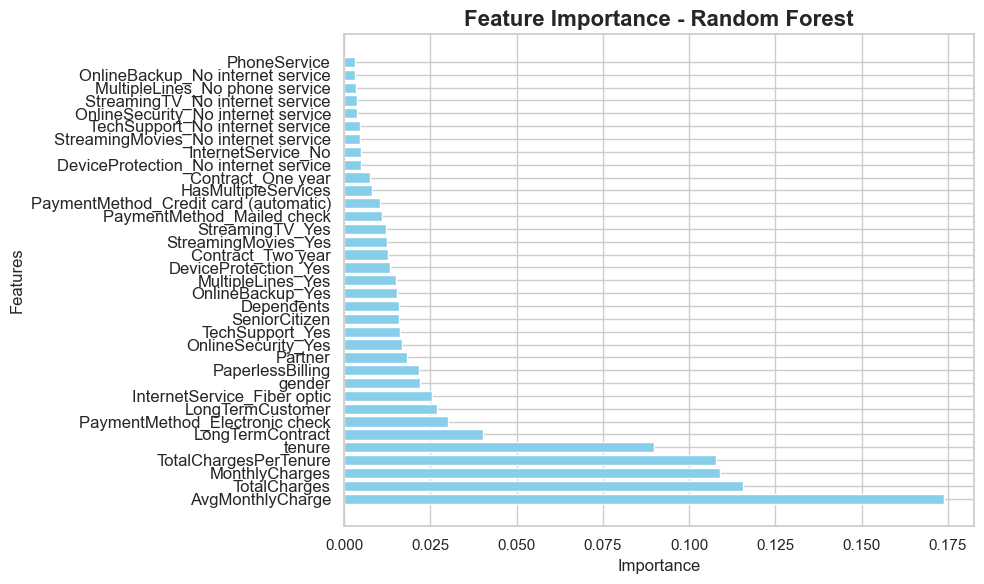

In [141]:
# -------------------------- Feature Importance (Random Forest) --------------------------

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

# Plot Feature Importances
plt.figure(figsize=(10,6))
plt.title("Feature Importance - Random Forest", fontsize=16, fontweight='bold')
plt.barh(range(len(indices)), importances[indices], align='center', color='skyblue')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=12)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


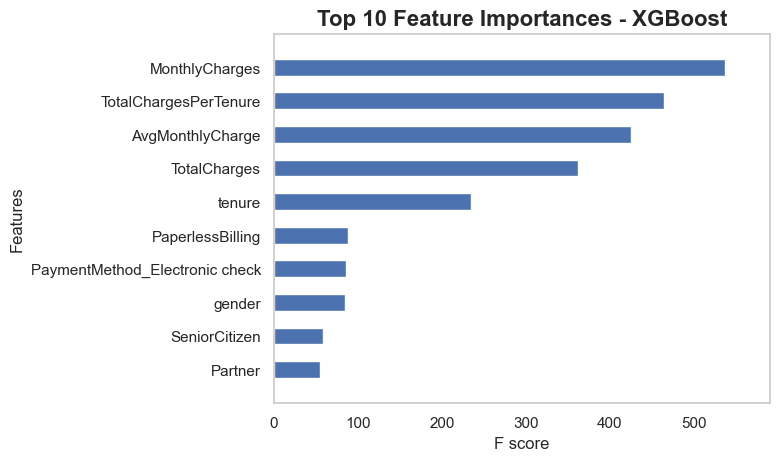

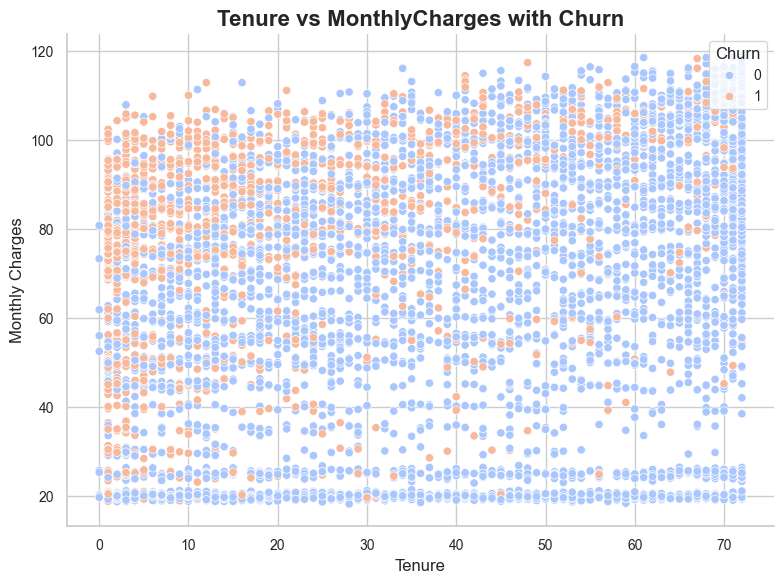

In [142]:
# -------------------------- Feature Importance (XGBoost) --------------------------

# Train an XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Plot feature importances from XGBoost
xgb.plot_importance(xgb_model, height=0.5, max_num_features=10, importance_type='weight', title="Feature Importance - XGBoost", 
                    grid=False, show_values=False)
plt.title('Top 10 Feature Importances - XGBoost', fontsize=16, fontweight='bold')
plt.show()

# -------------------------- Scatter Plot: Relationship between tenure and churn --------------------------

plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=data, palette='coolwarm')
plt.title('Tenure vs MonthlyCharges with Churn', fontsize=16, fontweight='bold')
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Monthly Charges', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Churn', loc='upper right', fontsize=10)
plt.tight_layout()
sns.despine()
plt.show()

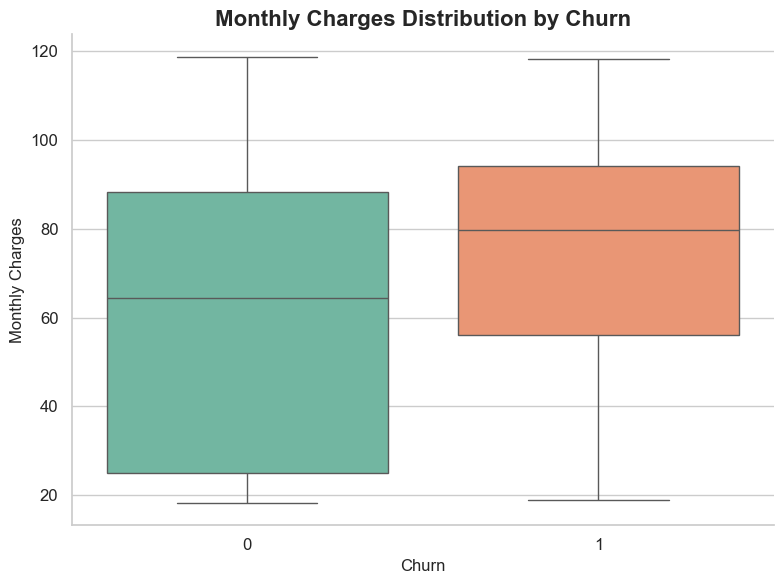

In [143]:
# -------------------------- Boxplot: Monthly Charges and Churn --------------------------

plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='Set2')
plt.title('Monthly Charges Distribution by Churn', fontsize=16, fontweight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Monthly Charges', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
sns.despine()
plt.show()

### **Step 3: Model Training**

In [144]:
# ------------------------ Model Training and Evaluation ------------------------

# Split data into features (X) and target (y)
X = data.drop('Churn', axis=1)  # Features (drop 'Churn' column)
y = data['Churn']  # Target (Churn column)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
# ---------------------------- Model 1: Random Forest ----------------------------

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Model
print("\n--- Random Forest Evaluation ---")

# Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')

# Calculate Precision
precision_rf = precision_score(y_test, y_pred_rf)
print(f'Random Forest Precision: {precision_rf:.4f}')

# Calculate Recall
recall_rf = recall_score(y_test, y_pred_rf)
print(f'Random Forest Recall: {recall_rf:.4f}')

# Calculate F1-score
f1_rf = f1_score(y_test, y_pred_rf)
print(f'Random Forest F1-score: {f1_rf:.4f}')

# Display the classification report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))


--- Random Forest Evaluation ---
Random Forest Accuracy: 0.7892
Random Forest Precision: 0.6377
Random Forest Recall: 0.4718
Random Forest F1-score: 0.5424

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix (Random Forest):
[[936 100]
 [197 176]]


In [146]:
# ---------------------------- Model 2: XGBoost ----------------------------

# Train the XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions with the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost Model
print("\n--- XGBoost Evaluation ---")

# Calculate Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')

# Calculate Precision
precision_xgb = precision_score(y_test, y_pred_xgb)
print(f'XGBoost Precision: {precision_xgb:.4f}')

# Calculate Recall
recall_xgb = recall_score(y_test, y_pred_xgb)
print(f'XGBoost Recall: {recall_xgb:.4f}')

# Calculate F1-score
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f'XGBoost F1-score: {f1_xgb:.4f}')

# Display the classification report
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix for XGBoost
print("\nConfusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))


--- XGBoost Evaluation ---
XGBoost Accuracy: 0.7864
XGBoost Precision: 0.6139
XGBoost Recall: 0.5201
XGBoost F1-score: 0.5631

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.61      0.52      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix (XGBoost):
[[914 122]
 [179 194]]


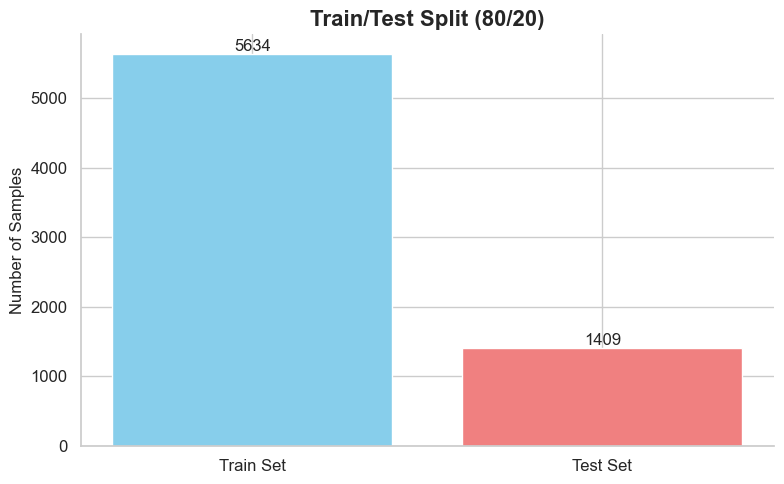

In [147]:
# -------------------------- Train/Test Split --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualising the train/test split (80/20 split)
plt.figure(figsize=(8, 5))
bars = plt.bar(['Train Set', 'Test Set'], [len(X_train), len(X_test)], color=['skyblue', 'lightcoral'])
plt.title('Train/Test Split (80/20)', fontsize=16, fontweight='bold')
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.bar_label(bars, fontsize=12)  # Display values on the bars
sns.despine()
plt.tight_layout()
plt.show()

Random Forest Model Accuracy: 0.79


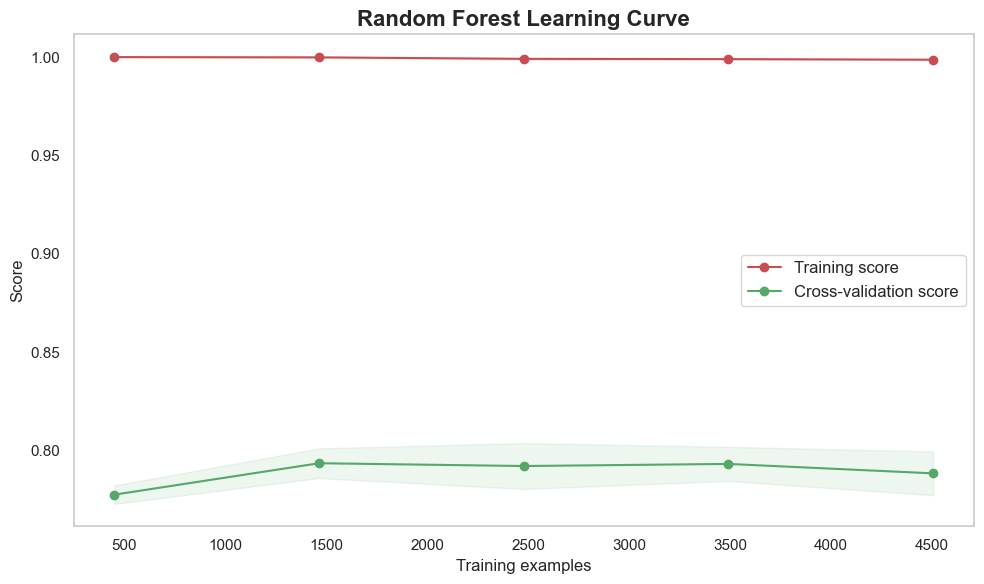

In [148]:
# -------------------------- Random Forest Model Training --------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Train the model

# Predictions
rf_predictions = rf.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Model Accuracy: {rf_accuracy:.2f}")

# -------------------------- Random Forest Learning Curve --------------------------
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel("Training examples", fontsize=12)
    plt.ylabel("Score", fontsize=12)

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    # Calculate the mean and standard deviation for training scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best", fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Plot Random Forest Learning Curve
plot_learning_curve(rf, "Random Forest Learning Curve", X_train, y_train, cv=5)

XGBoost Model Accuracy: 0.79


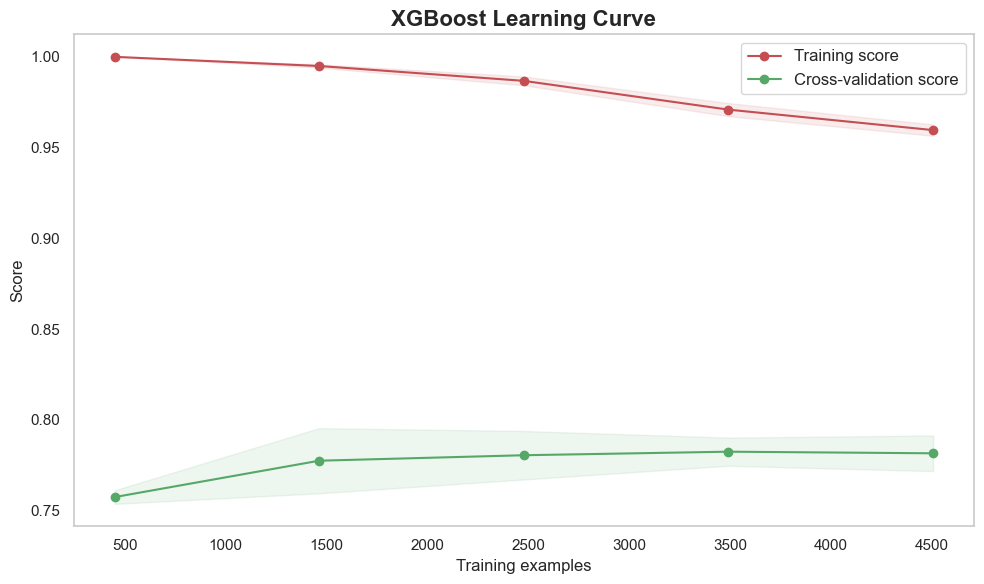

In [149]:
# -------------------------- XGBoost Model Training --------------------------
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)  # Train the model

# Predictions
xgb_predictions = xgb_model.predict(X_test)

# Calculate accuracy for XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Model Accuracy: {xgb_accuracy:.2f}")

# -------------------------- XGBoost Learning Curve --------------------------
plot_learning_curve(xgb_model, "XGBoost Learning Curve", X_train, y_train, cv=5)

### **Step 4: Model Evaluation and Selection**

In [150]:
# Calculate performance metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# Calculate performance metrics for XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

# ---------------------------- Compare Performance ----------------------------
print("\n--- Model Performance Comparison ---")
print(f"Random Forest: Accuracy={rf_accuracy:.4f}, Precision={rf_precision:.4f}, Recall={rf_recall:.4f}, F1-score={rf_f1:.4f}")
print(f"XGBoost: Accuracy={xgb_accuracy:.4f}, Precision={xgb_precision:.4f}, Recall={xgb_recall:.4f}, F1-score={xgb_f1:.4f}")

# Select the best model based on F1-score
if rf_f1 > xgb_f1:
    best_model = rf_model
    best_model_name = "Random Forest"
else:
    best_model = xgb_model
    best_model_name = "XGBoost"

print(f"\nBest Model: {best_model_name} with F1-score: {max(rf_f1, xgb_f1):.4f}")


--- Model Performance Comparison ---
Random Forest: Accuracy=0.7892, Precision=0.6377, Recall=0.4718, F1-score=0.5424
XGBoost: Accuracy=0.7864, Precision=0.6139, Recall=0.5201, F1-score=0.5631

Best Model: XGBoost with F1-score: 0.5631


In [151]:
# ---------------------------- Hyperparameter Tuning ----------------------------

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                               param_grid=rf_param_grid, 
                               scoring='f1', 
                               cv=5)
rf_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for Random Forest
print("\nBest Hyperparameters for Random Forest:")
print(rf_grid_search.best_params_)


Best Hyperparameters for Random Forest:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


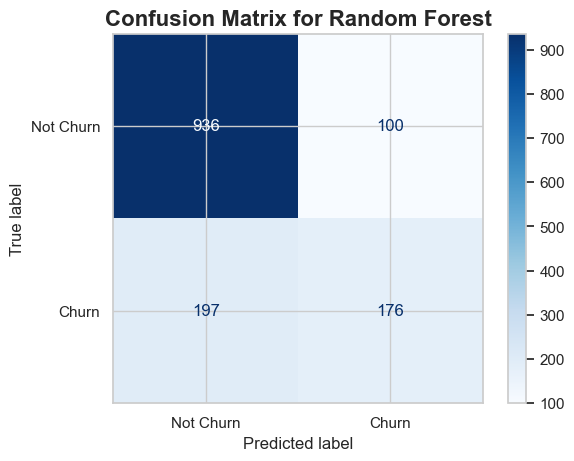

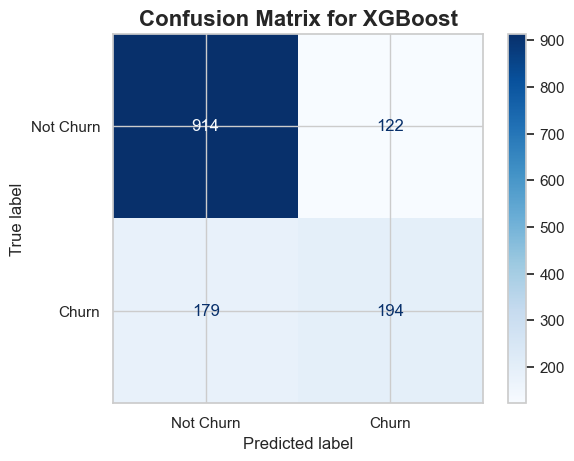

In [152]:
# -------------------------- Confusion Matrix --------------------------
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churn', 'Churn'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16, fontweight='bold')
    plt.show()

# Plotting Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest')

# Plotting Confusion Matrix for XGBoost
plot_confusion_matrix(y_test, xgb_predictions, 'XGBoost')

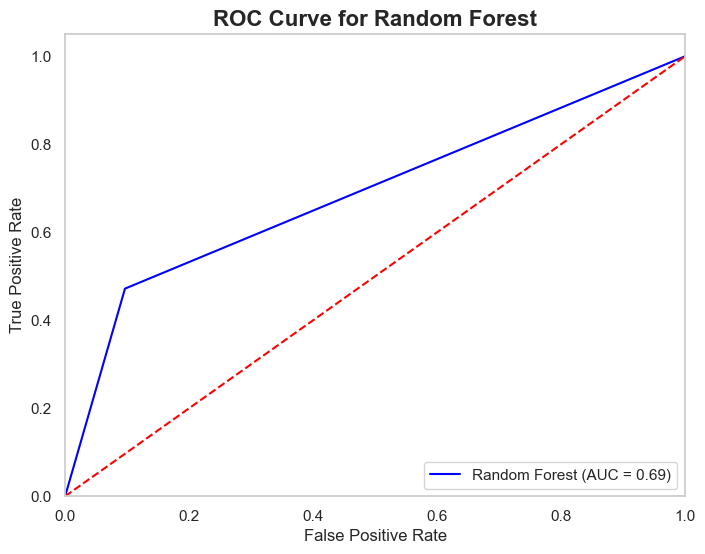

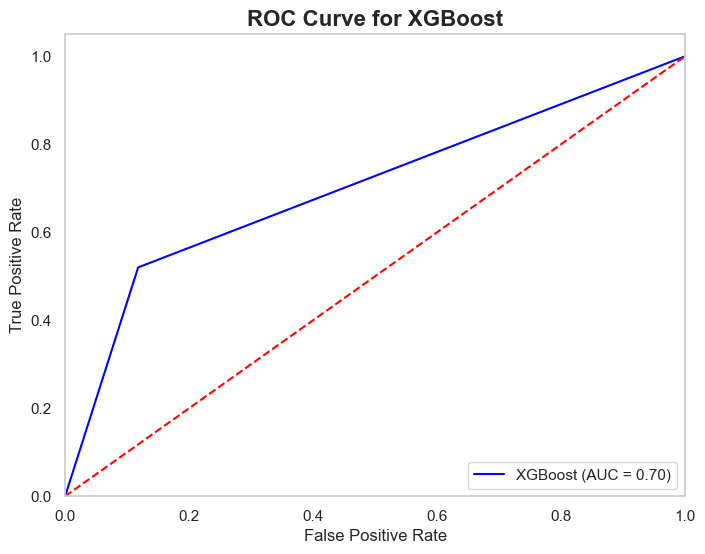

In [153]:
# -------------------------- ROC Curve --------------------------
def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve for {model_name}', fontsize=16, fontweight='bold')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Plotting ROC Curve for Random Forest
plot_roc_curve(y_test, rf_predictions, 'Random Forest')

# Plotting ROC Curve for XGBoost
plot_roc_curve(y_test, xgb_predictions, 'XGBoost')

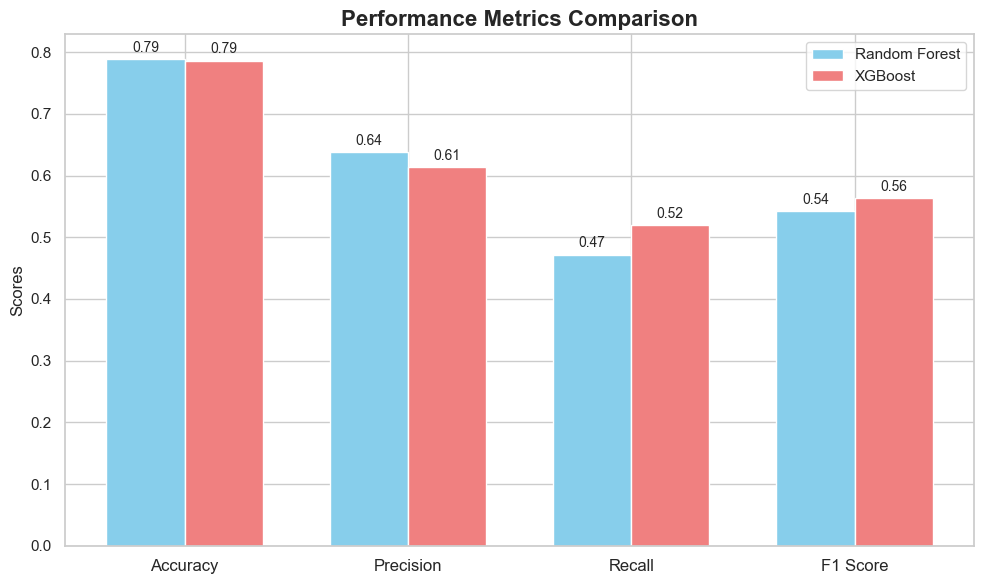

In [154]:
# -------------------------- Performance Metrics Bar Chart --------------------------
def plot_performance_metrics(rf_metrics, xgb_metrics):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    rf_scores = [rf_metrics['accuracy'], rf_metrics['precision'], rf_metrics['recall'], rf_metrics['f1']]
    xgb_scores = [xgb_metrics['accuracy'], xgb_metrics['precision'], xgb_metrics['recall'], xgb_metrics['f1']]

    x = np.arange(len(metrics))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='skyblue')
    bars2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color='lightcoral')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores', fontsize=12)
    ax.set_title('Performance Metrics Comparison', fontsize=16, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, fontsize=12)
    ax.legend()

    # Adding score values on the bars
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

    add_value_labels(bars1)
    add_value_labels(bars2)

    plt.tight_layout()
    plt.show()

# Performance Metrics Calculation
rf_metrics = {
    'accuracy': rf_accuracy,
    'precision': precision_score(y_test, rf_predictions),
    'recall': recall_score(y_test, rf_predictions),
    'f1': f1_score(y_test, rf_predictions)
}

xgb_metrics = {
    'accuracy': xgb_accuracy,
    'precision': precision_score(y_test, xgb_predictions),
    'recall': recall_score(y_test, xgb_predictions),
    'f1': f1_score(y_test, xgb_predictions)
}

# Plotting Performance Metrics
plot_performance_metrics(rf_metrics, xgb_metrics)

### **Step 5: Model Deployment**

In [155]:
# -------------------------- Model Deployment -------------------------- 

# Save the best model
best_rf_model = rf_grid_search.best_estimator_  # Assuming you want to save Random Forest
joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']